In [ ]:
#Import modules
from fastai.vision.all import *
import numpy as np

In [ ]:
path = untar_data(URLs.PETS)

we will use the Oxford-IIIT Pet Dataset that contains images of cats and dogs of 37 different breeds. We will first show how to build a simple cat-vs-dog classifier, then a little bit more advanced model that can classify all breeds.

This code download the datasets amd only do this once.

In [ ]:
#Path
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [ ]:
#Getting all files
image_files = get_image_files(path/"images")

get_image_file() gets all the images in one folder recursively

In [ ]:
def label_func(f): return f[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, image_files, label_func,item_tfms=Resize(224))

to get our data ready I have passed it into the dataloader 

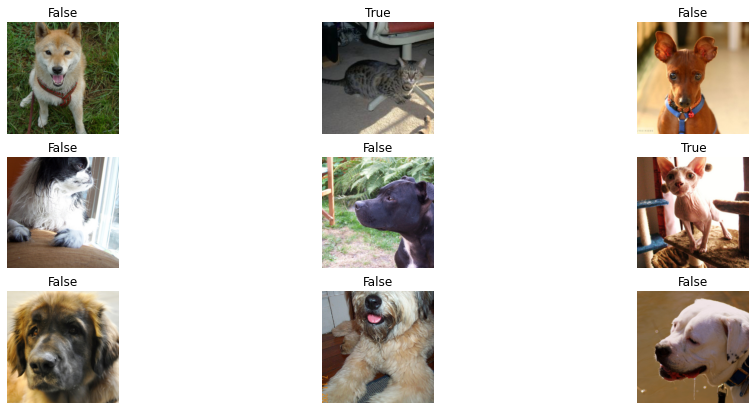

In [ ]:
dls.show_batch(figsize=(16,7))

I have checked if everythigs is fine with show_batch method 
True is for cat and False is for Dog

In [ ]:
learn = cnn_learner(dls, resnet34,metrics=error_rate)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

Here above download ResNet model which was pretained in imagenet
I have also shows the model layers

In [ ]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.166966,0.017881,0.006089,36:18


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.062012,0.038508,0.010149,50:51


i have created a Learner, which is a fastai object that combines the data and a model for training, and uses transfer learning to fine tune a pretrained model in just two lines of code

 we get a model with an error rate of 0.1%

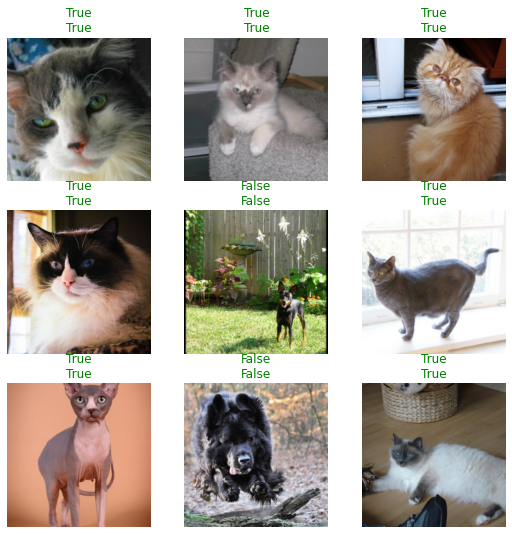

In [ ]:
learn.show_results()

In [48]:
files = "/content/cats.jpg"
learn.predict(files)

('True', tensor(1), tensor([5.7571e-14, 1.0000e+00]))

Predictions on own image or new images

I have provided some few images to test if u want to use your own image then put your image into same folder and change the path respective to you if you are using your own image 